In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("user_behavior_dataset.csv")
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
data.shape

(700, 11)

In [ ]:
data.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


**Examining Categorical and Numerical Data**

In [ ]:
for col in data.select_dtypes(include=["object"]).columns:
  print(data[col].value_counts())

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
Operating System
Android    554
iOS        146
Name: count, dtype: int64
Gender
Male      364
Female    336
Name: count, dtype: int64


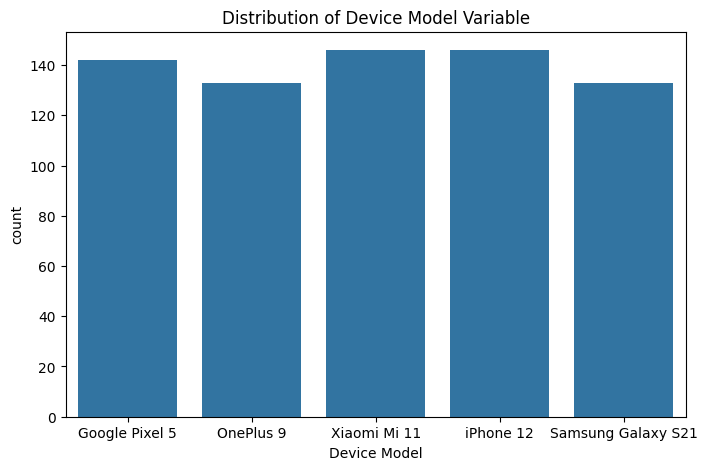

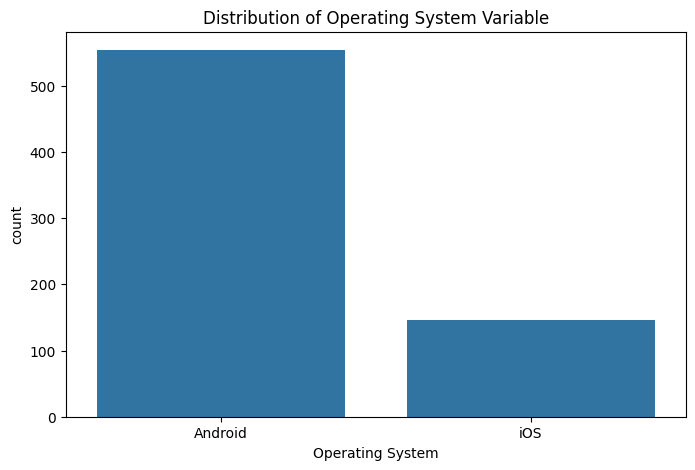

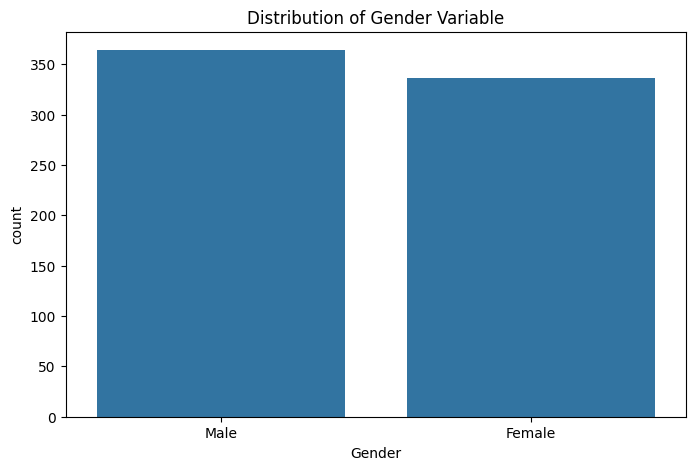

In [ ]:
for col in data.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=data)
  plt.title(f"Distribution of {col} Variable")
  plt.show()

In [ ]:
def plotHistogram(column):
  plt.figure()
  plt.hist(data[column],bins=85,color="skyblue")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title("Data Frequency - {}".format(column))
  plt.show()

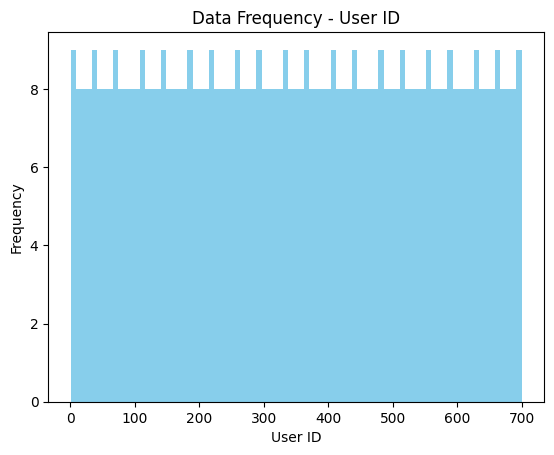

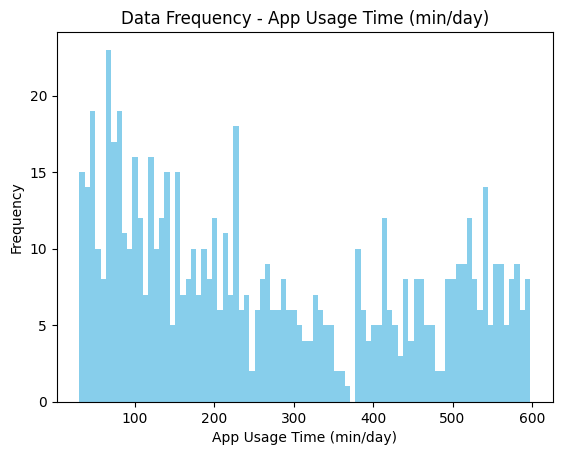

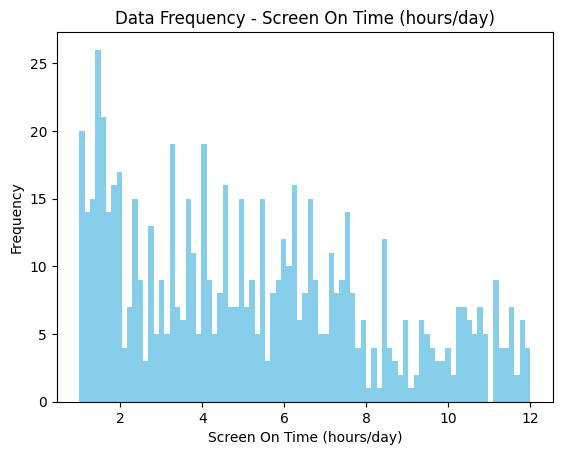

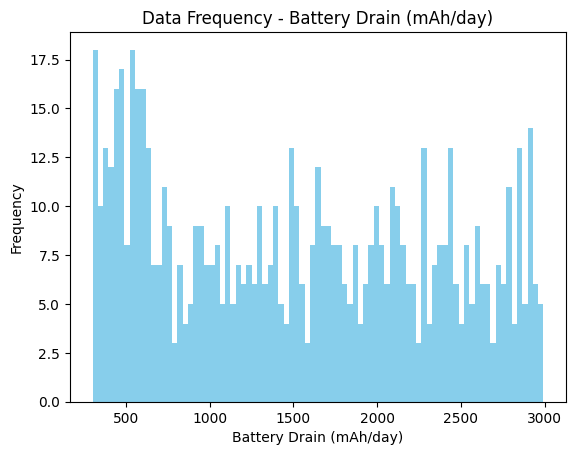

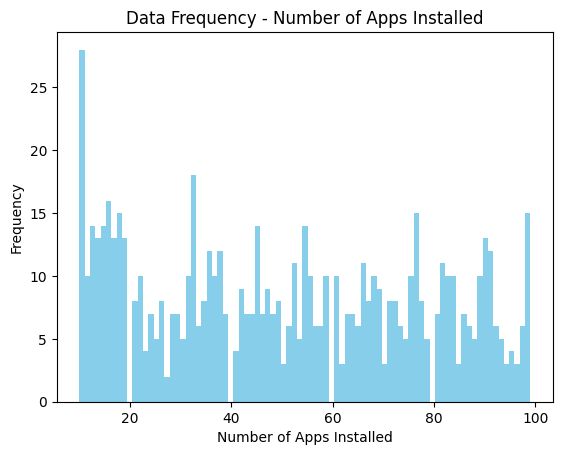

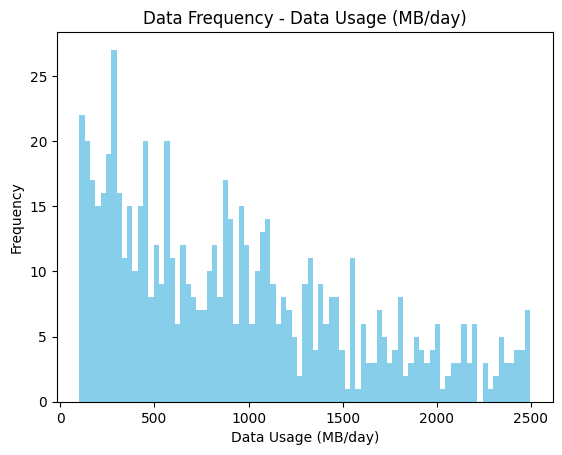

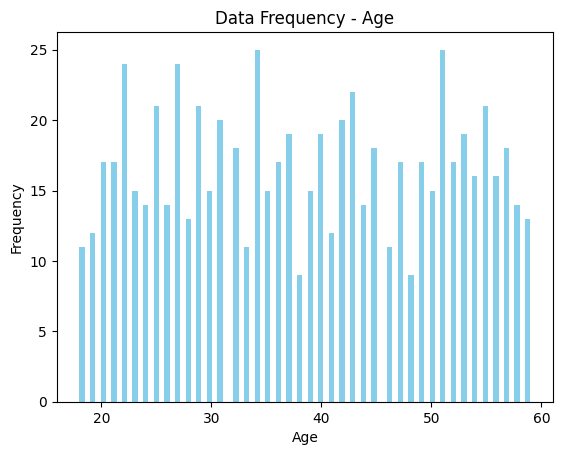

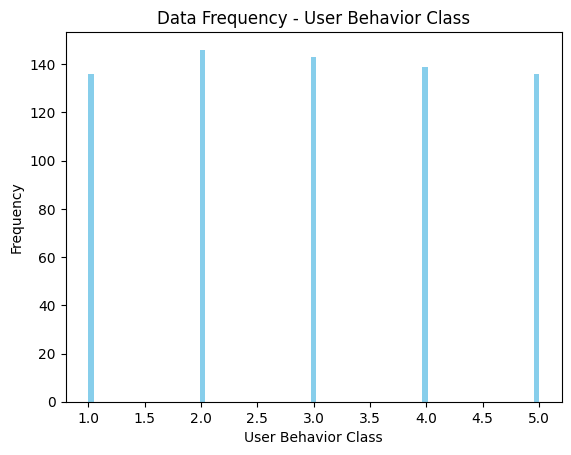

In [ ]:
numeric_columns=data.select_dtypes(include=['number']).columns
for i in numeric_columns:
  plotHistogram(i)

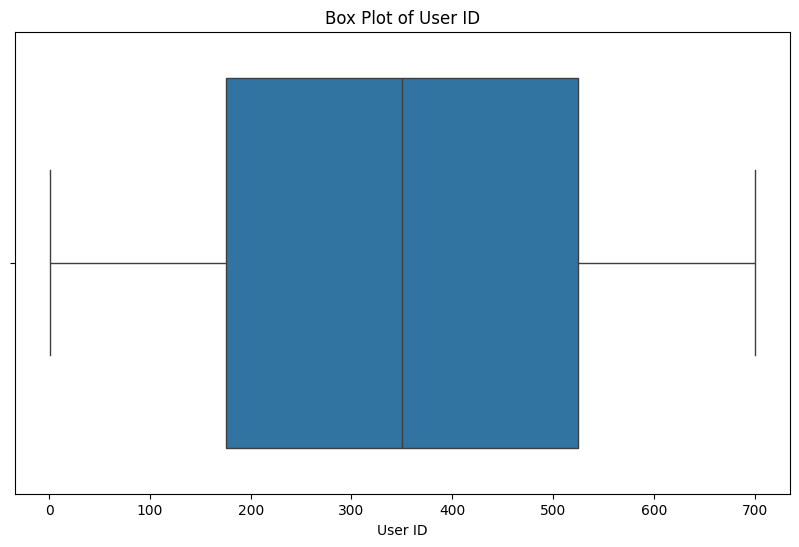

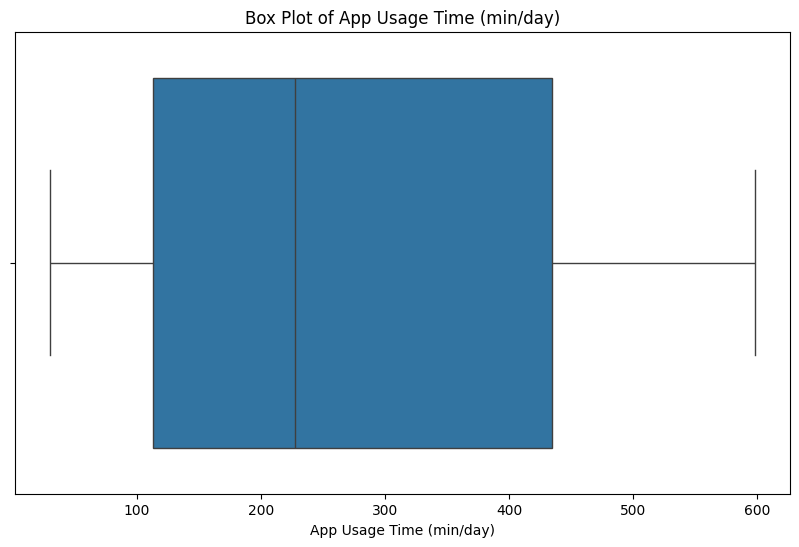

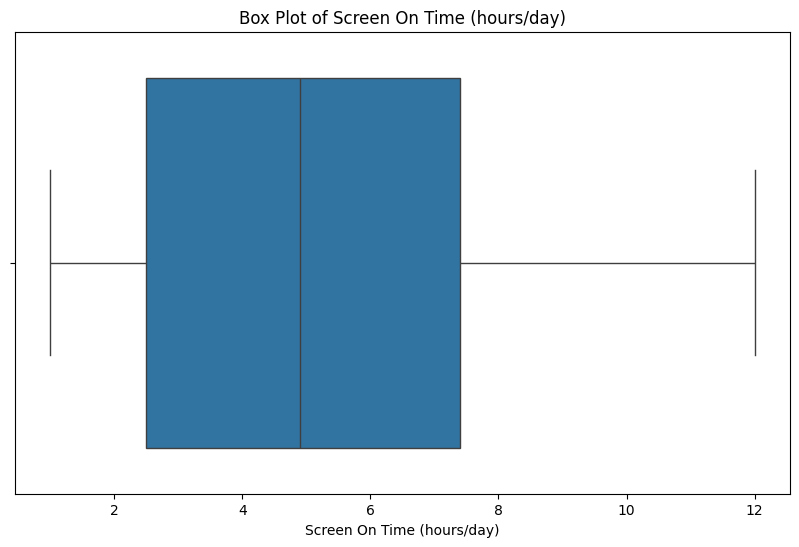

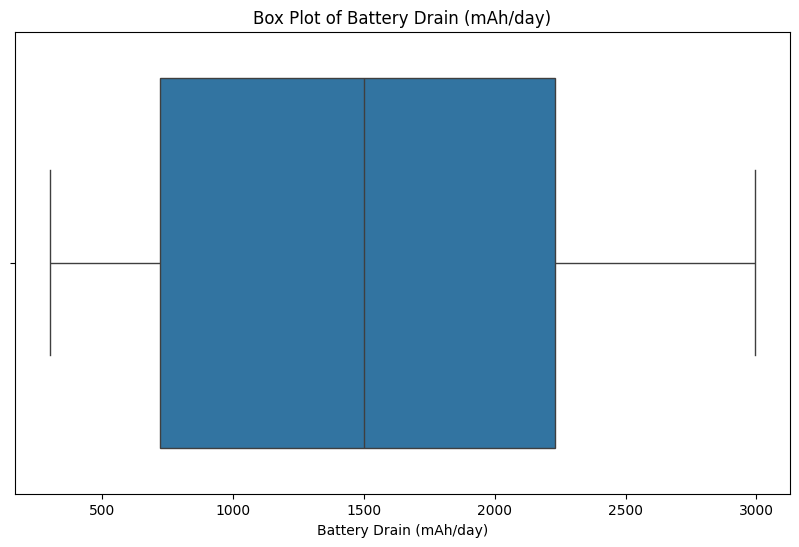

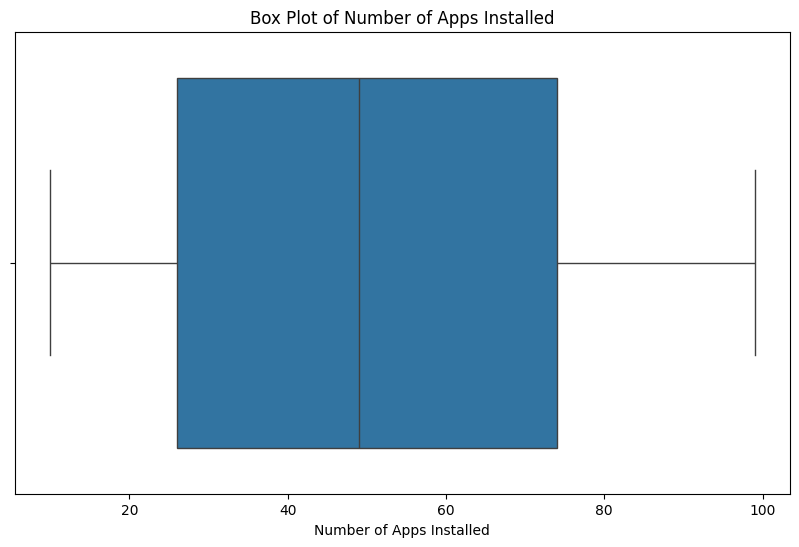

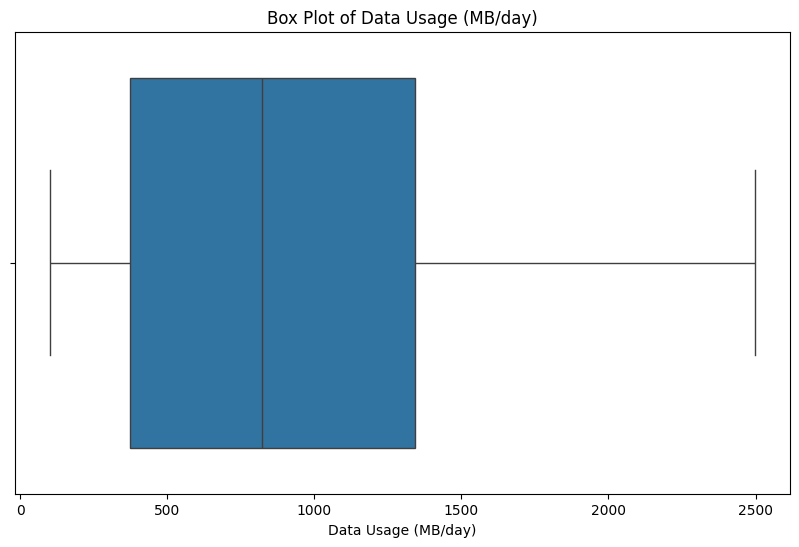

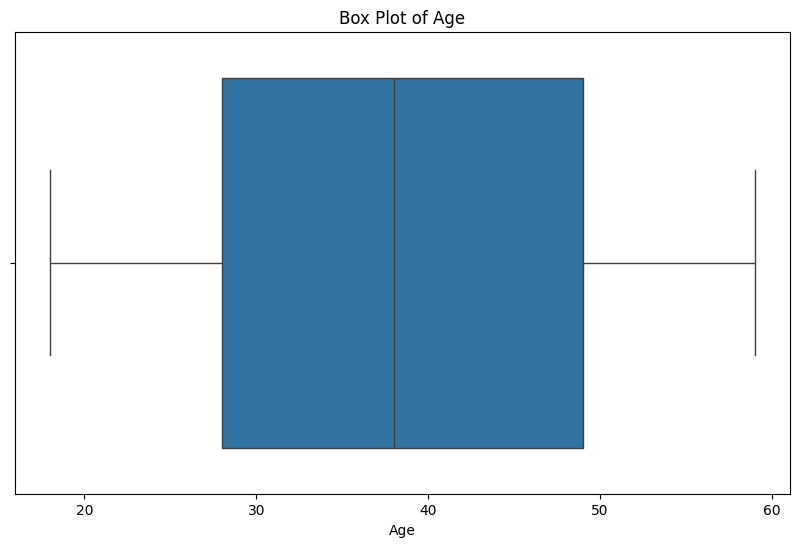

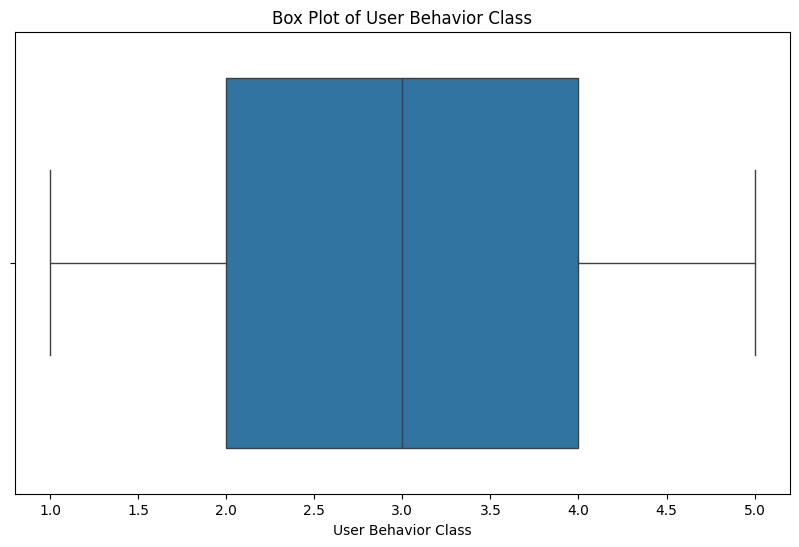

In [ ]:
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

**Correlation Matrix**

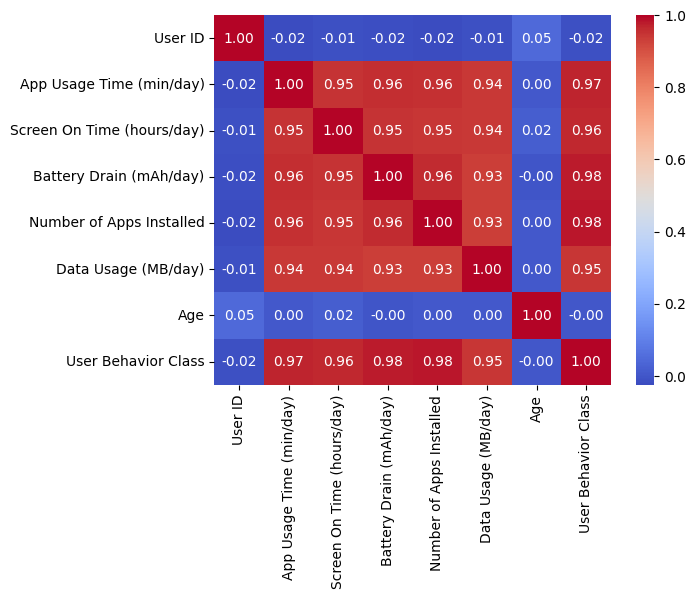

In [ ]:
sns.heatmap(data[numeric_columns].corr(),annot=True,linecolor="white",cmap="coolwarm",fmt=".2f")
plt.show()

In [ ]:
# Correlation of dependent variable and other variables
correlation_matrix=data[numeric_columns].corr()
dependent_variable = 'Screen On Time (hours/day)'  # dependent variable
correlation_with_dependent = correlation_matrix[dependent_variable].sort_values(ascending=False)

print("Correlation (With Dependent Variable):")
print(correlation_with_dependent)


Correlation (With Dependent Variable):
Screen On Time (hours/day)    1.000000
User Behavior Class           0.964581
App Usage Time (min/day)      0.950333
Battery Drain (mAh/day)       0.948983
Number of Apps Installed      0.946975
Data Usage (MB/day)           0.941322
Age                           0.017232
User ID                      -0.014287
Name: Screen On Time (hours/day), dtype: float64


**Hypothesis Tests**

**1)Screen Time Difference Between Different Gender** <br>

**Null Hypothesis (H0):**There is no significant difference in average screen time between male and female users. <br>
**Alternative Hypothesis (H1):** There is a significant difference in average screen time between male and female users.

In [ ]:
from statsmodels.stats.weightstats import ztest

# Separating male and female users
female_screen_time=data[data['Gender']=='Female']['Screen On Time (hours/day)']
male_screen_time=data[data['Gender']=='Male']['Screen On Time (hours/day)']

# z-test
z_stat,p_value=ztest(female_screen_time,male_screen_time)
print("z static",z_stat)
print("p-value",p_value)

alpha=0.05
if p_value<alpha:
  print("Result: The difference between the two groups is statistically significant.")
else:
  print("Result: The difference between the two groups is not statistically significant.")


z static -0.09440784461385675
p-value 0.9247851845390681
Result: The difference between the two groups is not statistically significant.


**2)Daily Data Usage Difference Between Age Groups** <br>

**Null Hypothesis (H0):** There is no significant difference in average daily data usage between young users and adult users. <br>
**Alternative Hypothesis (H1):** There is a significant difference in average daily data usage between young users and adult users.

In [ ]:
# Defining age groups (18-25 young,26+ adult )
data['Age Group'] = pd.cut(data['Age'], bins=[0, 25, 100], labels=['Young', 'Adult'])

young_data_usage=data[data['Age Group']=='Young']['Data Usage (MB/day)']
adult_data_usage=data[data['Age Group']=='Adult']['Data Usage (MB/day)']

from scipy.stats import mannwhitneyu
u_stat,p_value=mannwhitneyu(young_data_usage,adult_data_usage)
print("U-statistic:",u_stat)
print("p-value:",p_value)

alpha=0.05
if p_value<alpha:
  print("Result: The difference between the two groups is statistically significant.")
else:
  print("Result: The difference between the two groups is not statistically significant.")



U-statistic: 40524.0
p-value: 0.11890136864124352
Result: The difference between the two groups is not statistically significant.


**3)Battery Consumption Difference by User Behavior Class**

**Null Hypothesis (H0):** There is no significant difference in average battery consumption between different classes of user behavior. <br>
**Alternative Hypothesis (H1):** There is a significant difference in average battery consumption between different classes of user behavior.

In [ ]:
from scipy.stats import kruskal

# Separating battery consumption data by user behavior classes
class_1 = data[data['User Behavior Class']==1]['Battery Drain (mAh/day)']
class_2 = data[data['User Behavior Class']==2]['Battery Drain (mAh/day)']
class_3 = data[data['User Behavior Class']==3]['Battery Drain (mAh/day)']
class_4 = data[data['User Behavior Class']==4]['Battery Drain (mAh/day)']
class_5 = data[data['User Behavior Class']==5]['Battery Drain (mAh/day)']

# kruskal-wallis test
stat,p_value=kruskal(class_1,class_2,class_3,class_4,class_5)
print("Kruskal-Wallis Test Statistic:",stat)
print("p-value:",p_value)

if p_value<0.05:
  print("Result: The difference between the two groups is statistically significant.")
else:
  print("Result: The difference between the two groups is not statistically significant.")

Kruskal-Wallis Test Statistic: 670.975443467646
p-value: 6.706608057458154e-144
Result: The difference between the two groups is statistically significant.


**4)Difference in Daily Application Usage Time According to Different Device Models** <br>

**Null Hypothesis (H0):** There is no significant difference in average daily application usage time between different device models. <br>
**Alternative Hypothesis (H1):** There is a significant difference in average daily application usage time between different device models.

In [ ]:
from scipy.stats import f_oneway

# Grouping by device model
groups = [group['App Usage Time (min/day)'].values for name, group in data.groupby('Device Model')]

# ANOVA test
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value<0.05:
  print("Result: The difference between the two groups is statistically significant.")
else:
  print("Result: The difference between the two groups is not statistically significant.")

F-statistic: 0.18204238830882613
p-value: 0.9477259874639891
Result: The difference between the two groups is not statistically significant.


**5)Number of Apps Installed by Device Model**

**Null Hypothesis (H0):** There is no significant difference in the number of downloaded applications between different device models. <br>
**Alternative Hypothesis (H1):** There is a significant difference in the number of downloaded applications between different device models.

In [ ]:
from scipy.stats import kruskal

groups = [group['Number of Apps Installed'].values for name, group in data.groupby('Device Model')]

# kruskal test
stat, p_value = kruskal(*groups)
print("Kruskal-Wallis Test Statistic:",stat)
print("p-value:",p_value)

if p_value<0.05:
  print("Result: The difference between the two groups is statistically significant.")
else:
  print("Result: The difference between the two groups is not statistically significant.")

Kruskal-Wallis Test Statistic: 1.2394432340923918
p-value: 0.8715628288079132
Result: The difference between the two groups is not statistically significant.


**6)Screen Time by Number of Installed Apps**

**Null Hypothesis (H0):** There is no significant difference between the number of downloaded applications and screen time. <br>
**Alternative Hypothesis (H1):** There is a significant difference between the number of downloaded applications and screen time.


In [ ]:
from scipy.stats import mannwhitneyu

# Create groups by calculating the median
median_apps = data['Number of Apps Installed'].median()
low_apps_group = data[data['Number of Apps Installed'] <= median_apps]['Screen On Time (hours/day)']
high_apps_group = data[data['Number of Apps Installed'] > median_apps]['Screen On Time (hours/day)']

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(low_apps_group, high_apps_group)

print("U-statistic:", u_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Result: There is a statistically significant difference in screen time between the two groups.")
else:
    print("Result: There is no statistically significant difference in screen time between the two groups.")


U-statistic: 2810.5
p-value: 8.431430872251144e-106
Result: There is a statistically significant difference in screen time between the two groups.


**Regression Analysis**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separating data into training and test sets
x = data[['Battery Drain (mAh/day)']].values  # independent variable
y = data['User Behavior Class'].values  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating model and training
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.0839163604519833
R-squared (R²): 0.9539798359021021


R² value being close to 1 indicates that the independent variables of the model explain the total change in the dependent variable very well. We can see this more clearly by visualizing

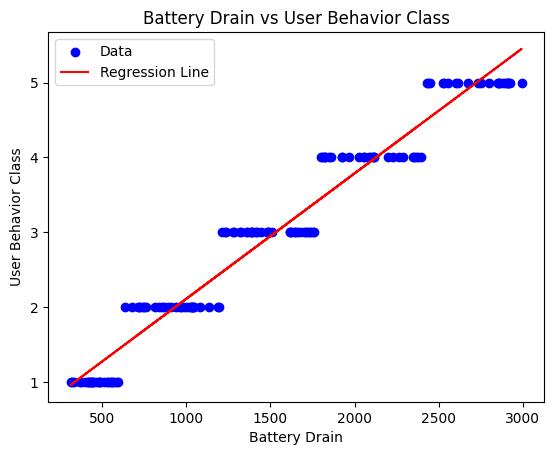

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Battery Drain")
plt.ylabel("User Behavior Class")
plt.title("Battery Drain vs User Behavior Class")
plt.legend()
plt.show()


**Multiple Regression Analysis**

In [ ]:
X=data[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']] # independent variables
y=data["User Behavior Class"] # dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean squared error:",mse)
print("r2 score:",r2)

Mean squared error: 0.05615734237745837
r2 score: 0.9692030243257364


With the r2 score being close to 1 and the visualizations, it seems that the predictive power of the model is quite good.

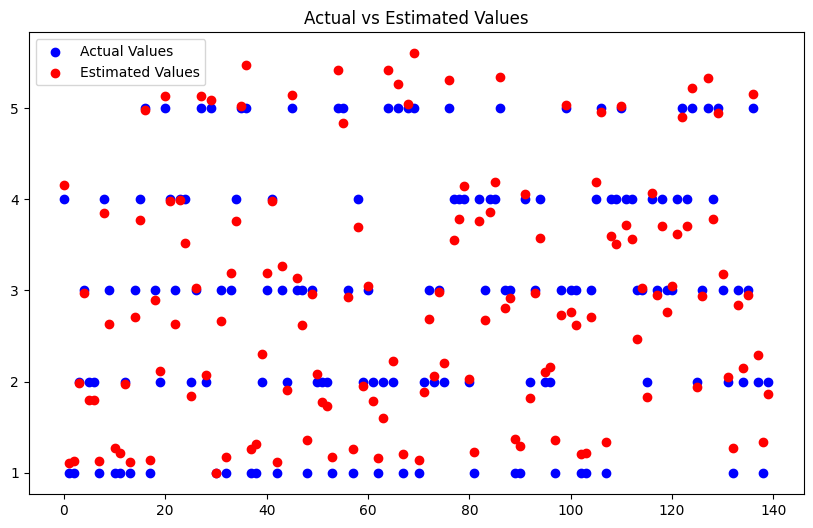

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual Values")
plt.scatter(range(len(y_test)), y_pred, color="red", label="Estimated Values")
plt.title("Actual vs Estimated Values")
plt.legend()
plt.show()
